1.4.13~14

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
img = cv2.imread('a4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines3.jpg',img)


True

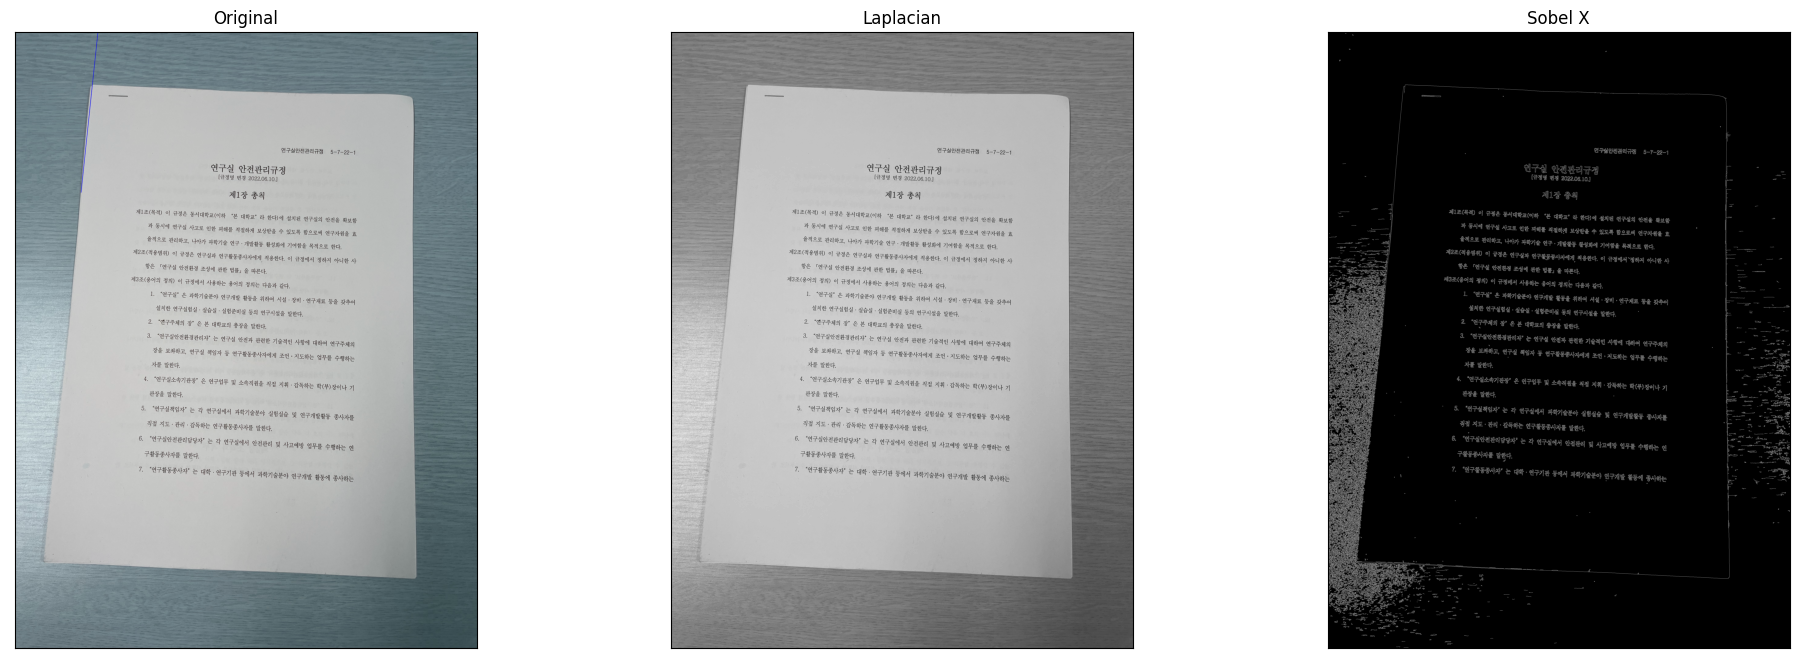

In [3]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(gray, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
import cv2
import numpy as np
img = cv2.imread('a4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imwrite('houghlines5.jpg',img)

True

In [5]:
import cv2
import numpy as np
img = cv2.imread('a4.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
def nothing(x):
    pass
 
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 100, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 100, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    img_rgb = cv2.imread('a4.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [3]:
import cv2
import numpy as np
img = cv2.imread('op.png',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.5.1 ~ 1.5.4

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
import cv2
import numpy as np
filename = 'chess.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [21]:
def nothing(x):
    pass

filename = 'ch.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [22]:
import cv2
import numpy as np
filename = 'chess.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv2.imwrite('subpixel5.png',img)


True

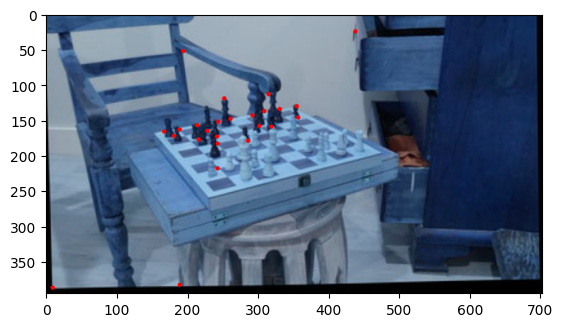

(<matplotlib.image.AxesImage at 0x2353df982e0>, None)

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('ch.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()


In [6]:
import cv2
import numpy as np
img = cv2.imread('ch.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('sim0.png')
imgsift=cv2.drawKeypoints(img,kp,imgsift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


(Text(0.5, 1.0, 'imgsift'), ([], []), ([], []))

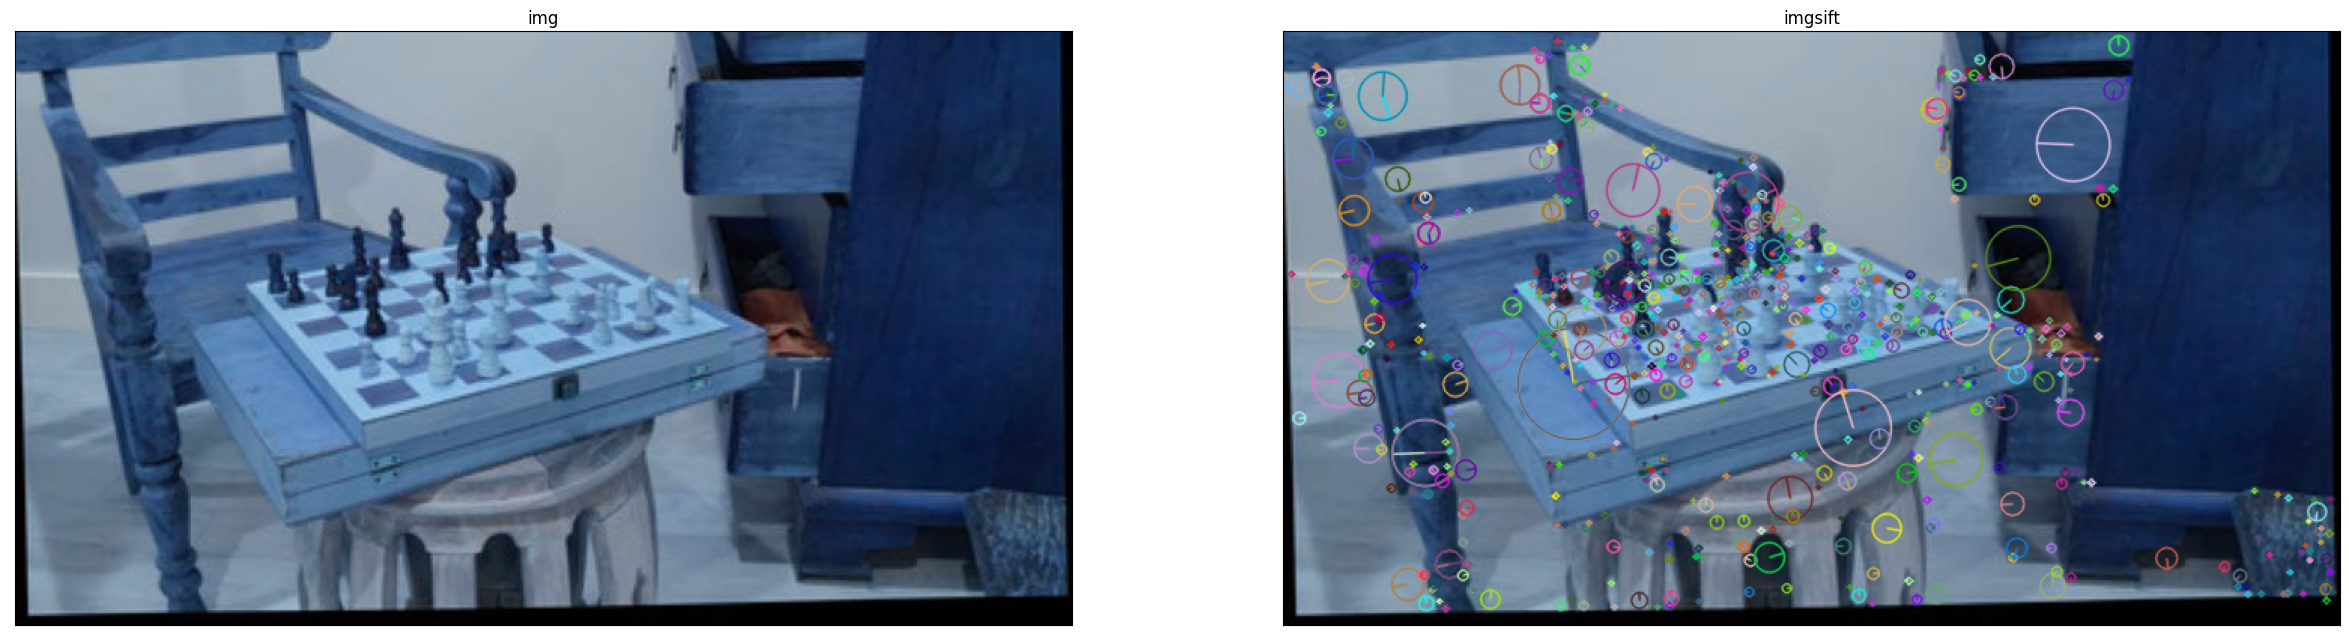

In [7]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgsift,cmap = 'gray')
plt.title('imgsift'), plt.xticks([]), plt.yticks([])